In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model as linMdl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics as met
from sklearn.model_selection import train_test_split

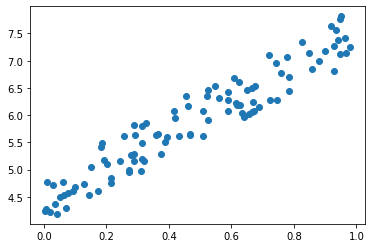

In [10]:
m = 100
X = np.random.rand(m, 1)
y = 3 * X + 4 + np.random.rand(m,1)

plt.scatter(X, y)
plt.show()

In [15]:
X[:3]

array([[0.54622166],
       [0.00498017],
       [0.77724279]])

In [17]:
X_b = np.concatenate((np.ones((m, 1)), X), axis=1)
X_b[:3]

array([[1.        , 0.54622166],
       [1.        , 0.00498017],
       [1.        , 0.77724279]])

In [20]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta

array([[4.3997322 ],
       [3.10027407]])

In [21]:
theta.shape

(2, 1)

In [23]:
X_b.T.shape

(2, 100)

In [0]:
X_new = np.array([[1, 0.6], [1, 4.1]])

In [26]:
theta.T.dot(X_new.T)

array([[ 6.25989664, 17.11085587]])

In [28]:
X[:3]

array([[0.54622166],
       [0.00498017],
       [0.77724279]])

In [29]:
lin = linMdl.LinearRegression()
lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin.coef_

array([[3.10027407]])

In [31]:
lin.intercept_

array([4.3997322])

In [32]:
theta

array([[4.3997322 ],
       [3.10027407]])

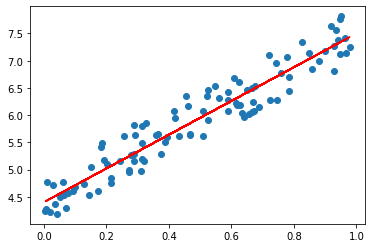

In [39]:
y_pred = lin.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.show()

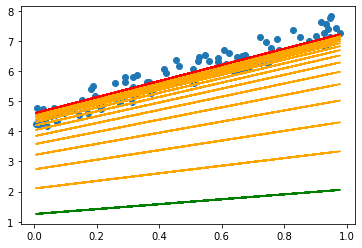

In [44]:
theta = np.random.rand(2, 1)
num_steps = 20
eta = 0.1
for i in range(num_steps):
  #calculate gradient
  gradient = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradient
  y_pred = X_b.dot(theta)
  if i == 0:
    plt.plot(X, y_pred, color="green")
  elif i == num_steps-1:
    plt.plot(X, y_pred, color="red")
  else:
    plt.plot(X, y_pred, color="orange")

plt.scatter(X, y)
plt.show()


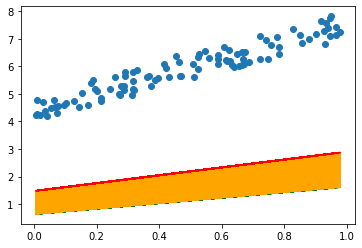

In [46]:
theta = np.random.rand(2, 1)
num_steps = 100
eta = 0.001
for i in range(num_steps):
  #calculate gradient
  gradient = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradient
  y_pred = X_b.dot(theta)
  if i == 0:
    plt.plot(X, y_pred, color="green")
  elif i == num_steps-1:
    plt.plot(X, y_pred, color="red")
  else:
    plt.plot(X, y_pred, color="orange")

plt.scatter(X, y)
plt.show()


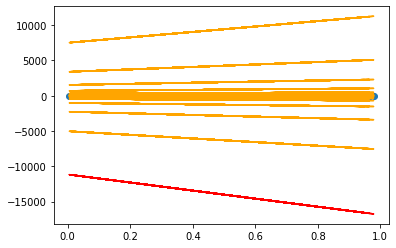

In [47]:
theta = np.random.rand(2, 1)
num_steps = 20
eta = 1
for i in range(num_steps):
  #calculate gradient
  gradient = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradient
  y_pred = X_b.dot(theta)
  if i == 0:
    plt.plot(X, y_pred, color="green")
  elif i == num_steps-1:
    plt.plot(X, y_pred, color="red")
  else:
    plt.plot(X, y_pred, color="orange")

plt.scatter(X, y)
plt.show()


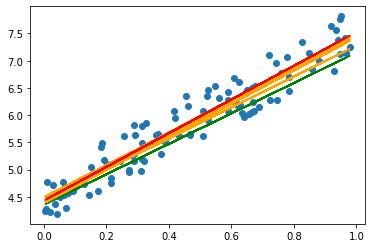

In [50]:
# Stochactis Gradient Descent SGD

def select_learning_rate(cur_iter):
  return 10 / (100 + cur_iter)

theta = np.random.rand(2, 1)
num_epoch = 20
#eta = 0.1
for i in range(num_epoch):
  for j in range(m): # epoch 
    #select random point
    rand_index = np.random.randint(0, m-1)
    X_rand = X_b[rand_index:rand_index+1] # [[1, 0.6]]
    y_rand = y[rand_index:rand_index+1]

    #calculate gradient by using single random point
    gradient = (2) * X_rand.T.dot(X_rand.dot(theta) - y_rand)
    eta = select_learning_rate(i*m + j)
    theta = theta - eta * gradient
  
  y_pred = X_b.dot(theta)
  if i == 0:
    plt.plot(X, y_pred, color="green")
  elif i == num_steps-1:
    plt.plot(X, y_pred, color="red")
  else:
    plt.plot(X, y_pred, color="orange")

plt.scatter(X, y)
plt.show()


In [49]:
sgd = linMdl.SGDRegressor(eta0=0.1)
sgd.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

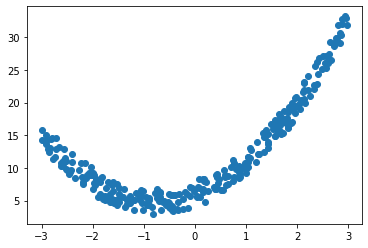

In [65]:
m = 300
X = np.random.rand(m, 1) * 6 - 3
y = 2*X**2 + 3*X + 4 + 4*np.random.rand(m, 1)

plt.scatter(X, y)
plt.show()

In [68]:
pipe = Pipeline([
                 ("scaler", StandardScaler()),
                 ("reg", linMdl.LinearRegression())
])
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

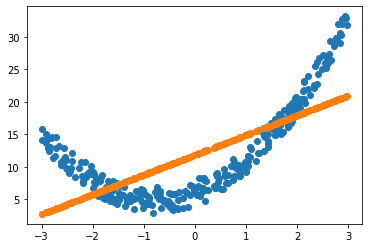

In [70]:
y_pred = pipe.predict(X)

plt.scatter(X, y)
plt.scatter(X, y_pred)
plt.show()

In [0]:
def plot_learning_curve(est, X_train, y_train, X_test, y_test):
  train_values = []
  test_values = []
  x_values = range(10, len(X_train), 10)
  for i in x_values:
    est.fit(X_train[:i], y_train[:i])

    y_pred = est.predict(X_train[:i])
    train_score = met.mean_squared_error(y_train[:i], y_pred, squared=False)
    train_values.append(train_score)

    y_pred = est.predict(X_test)
    test_score = met.mean_squared_error(y_test, y_pred, squared=False)
    test_values.append(test_score)
  
  plt.plot(x_values, train_values, label="train")
  plt.plot(x_values, test_values, label="test")
  plt.legend()
  plt.title("Learning Curve for " + est.__class__.__name__)
  plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

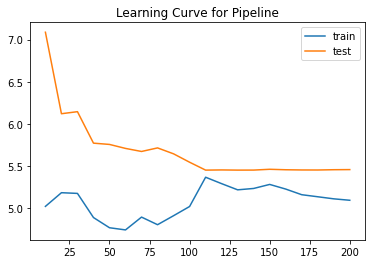

In [77]:
plot_learning_curve(pipe, X_train,y_train, X_test, y_test)# underfitting

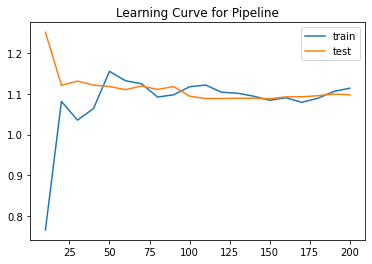

In [80]:
pipe = Pipeline([
                 ("poly", PolynomialFeatures(degree=2)),
                 ("scaler", StandardScaler()),
                 ("reg", linMdl.LinearRegression())
])

plot_learning_curve(pipe, X_train,y_train, X_test, y_test)

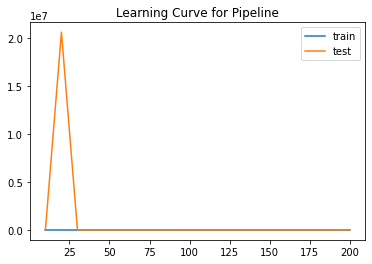

In [81]:
pipe = Pipeline([
                 ("poly", PolynomialFeatures(degree=20)),
                 ("scaler", StandardScaler()),
                 ("reg", linMdl.LinearRegression())
])

plot_learning_curve(pipe, X_train,y_train, X_test, y_test)

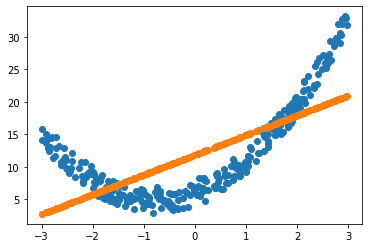

In [82]:
pipe = Pipeline([
                 ("scaler", StandardScaler()),
                 ("reg", linMdl.LinearRegression())
])
pipe.fit(X, y)

y_pred = pipe.predict(X)

plt.scatter(X, y)
plt.scatter(X, y_pred)
plt.show()

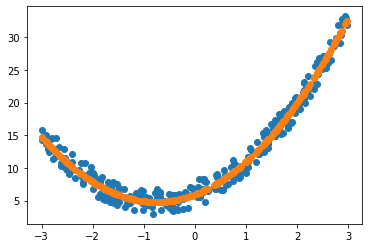

In [83]:
pipe = Pipeline([
                 ("ploy", PolynomialFeatures(degree=2)),
                 ("scaler", StandardScaler()),
                 ("reg", linMdl.LinearRegression())
])
pipe.fit(X, y)

y_pred = pipe.predict(X)

plt.scatter(X, y)
plt.scatter(X, y_pred)
plt.show()

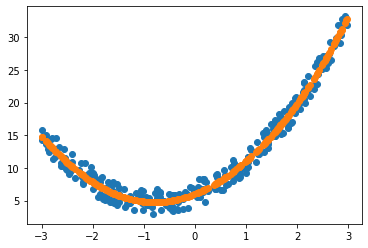

In [84]:
pipe = Pipeline([
                 ("ploy", PolynomialFeatures(degree=5)),
                 ("scaler", StandardScaler()),
                 ("reg", linMdl.LinearRegression())
])
pipe.fit(X, y)

y_pred = pipe.predict(X)

plt.scatter(X, y)
plt.scatter(X, y_pred)
plt.show()